<a href="https://colab.research.google.com/github/krshrey10/Climate_Data_Dashboard/blob/main/Climate_Data_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy plotly dash kaleido
!pip install seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
from datetime import datetime

The error message `ModuleNotFoundError: No module named 'dash_bootstrap_components'` indicates that the `dash_bootstrap_components` library is not installed in your environment.

In [ ]:
!pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
# NASA GISTEMP data URL
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"

# Load data
df = pd.read_csv(url, skiprows=1, na_values="***")
print(df.head())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.20 -0.25 -0.09 -0.16 -0.09 -0.22 -0.20 -0.10 -0.15 -0.23 -0.23   
1  1881 -0.20 -0.15  0.02  0.04  0.06 -0.19  0.01 -0.04 -0.16 -0.22 -0.19   
2  1882  0.16  0.13  0.04 -0.16 -0.14 -0.23 -0.16 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.29 -0.37 -0.12 -0.19 -0.18 -0.07 -0.08 -0.14 -0.22 -0.12 -0.24   
4  1884 -0.13 -0.08 -0.36 -0.40 -0.34 -0.35 -0.31 -0.28 -0.27 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.18 -0.17   NaN   NaN -0.11 -0.17 -0.20  
1 -0.07 -0.09 -0.10 -0.18  0.04 -0.07 -0.19  
2 -0.37 -0.11 -0.09  0.07 -0.09 -0.16 -0.19  
3 -0.11 -0.18 -0.20 -0.34 -0.16 -0.10 -0.19  
4 -0.31 -0.28 -0.27 -0.11 -0.37 -0.31 -0.29  


In [ ]:
# Melt dataframe to long format
df_melted = df.melt(id_vars=['Year'],
                    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    var_name='Month',
                    value_name='Temperature')

# Convert to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'])

# Clean temperature data
df_melted['Temperature'] = pd.to_numeric(df_melted['Temperature'], errors='coerce')
df_melted.dropna(subset=['Temperature'], inplace=True)

# Add decade column for grouping
df_melted['Decade'] = (df_melted['Year']//10)*10

<ipython-input-6-2329368251>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'])


In [ ]:
fig_trend = px.line(df_melted,
                   x='Date',
                   y='Temperature',
                   title='Global Temperature Anomalies (1880-Present)',
                   labels={'Temperature': 'Temperature Anomaly (°C)'},
                   template='plotly_dark')

fig_trend.update_layout(hovermode="x unified")
fig_trend.show()

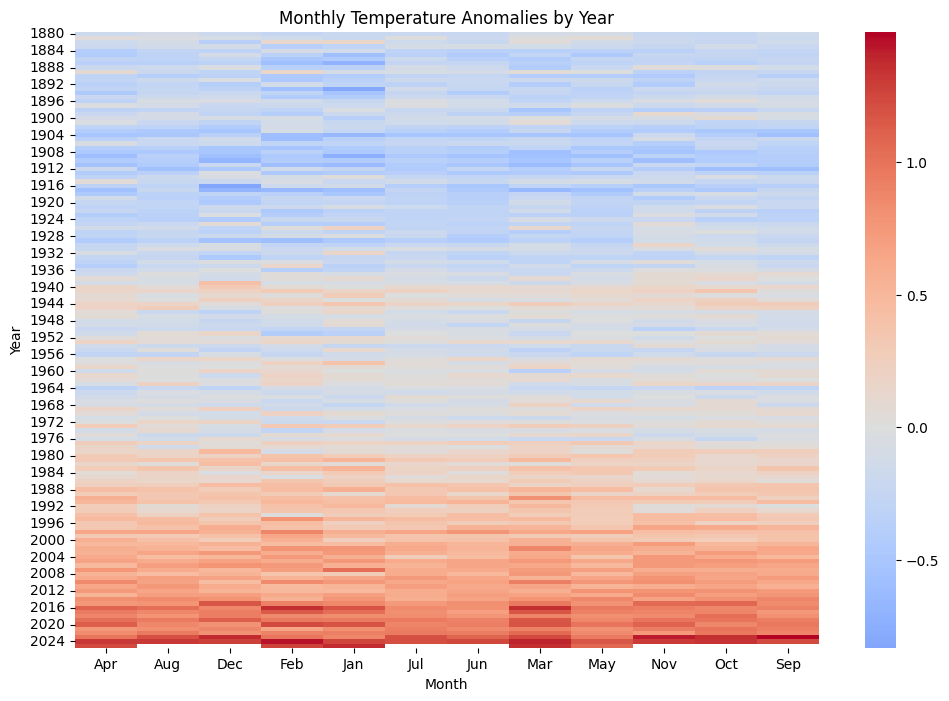

In [ ]:
# Pivot for heatmap
heatmap_data = df_melted.pivot(index="Year", columns="Month", values="Temperature")

# Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", center=0)
plt.title("Monthly Temperature Anomalies by Year")
plt.show()

# Interactive Plotly version
fig_heatmap = px.imshow(heatmap_data,
                       labels=dict(x="Month", y="Year", color="Anomaly"),
                       x=heatmap_data.columns,
                       y=heatmap_data.index,
                       title="Monthly Temperature Anomalies Heatmap",
                       color_continuous_scale="RdBu_r",
                       aspect="auto")
fig_heatmap.show()

In [ ]:
fig_box = px.box(df_melted,
                x='Decade',
                y='Temperature',
                title='Temperature Distribution by Decade',
                color='Decade',
                color_discrete_sequence=px.colors.sequential.Plasma_r)
fig_box.show()

In [ ]:
app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

app.layout = dbc.Container([
    html.H1("NASA Global Climate Dashboard", className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_trend), width=12, className="mb-4"),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_heatmap), width=6),
        dbc.Col(dcc.Graph(figure=fig_box), width=6),
    ]),

    html.Div([
        html.P("Data Source: NASA GISS Surface Temperature Analysis (GISTEMP)"),
        html.P(f"Last Updated: {datetime.now().strftime('%Y-%m-%d')}")
    ], className="mt-4 text-muted")
], fluid=True)

# Run app in Colab (temporary)
app.run(mode='inline', port=8050)

<IPython.core.display.Javascript object>

In [ ]:
fig_trend.write_html("temperature_trend.html")
fig_heatmap.write_html("temperature_heatmap.html")
fig_box.write_html("decadal_distribution.html")

In [ ]:
with open("climate_dashboard.py", "w") as f:
    f.write("""
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

# Load data (sample - replace with your data loading code)
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df = pd.read_csv(url, skiprows=1, na_values="***")

# [Insert all your data processing code here]

app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

app.layout = dbc.Container([
    # [Insert your layout code here]
])

if __name__ == '__main__':
    app.run_server(debug=True)
""")

In [ ]:
from google.colab import files
files.download('climate_dashboard.py')
files.download('temperature_trend.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>